# Get Data

In [1]:
import time, sys
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import json
from matplotlib import pyplot as plt
import numpy as np
#import pandas
import pandas as pd



def GetSteamReviews(appid, max_num_reviews, All_language):
#appid=637090
#max_num_reviews=2440
    api_url = "http://store.steampowered.com/appreviews/"
    if (All_language):
        defaults = {
        # Copied from: https://gist.github.com/adambuczek/95906b0c899c5311daeac515f740bf33
            'json': '1',
            'language': "all",  
            'filter': "recent", 
            'review_type': "all",
            'purchase_type': "all",
        } 
    else:
        defaults = {
        # Copied from: https://gist.github.com/adambuczek/95906b0c899c5311daeac515f740bf33
            'json': '1',
            'language': "english", 
            'filter': "recent",  
            'review_type': "all",
            'purchase_type': "all",
        }



    url=api_url+str(appid)
    req_data = dict(defaults)
    req_data['appids'] = str(appid)

    dataframe=pd.DataFrame()
    new_reviews = []
    offset = 0
    num_reviews = max_num_reviews
    try_count = 0
    while (offset < num_reviews) and (try_count < 3):
        req_data['start_offset'] = str(offset)
        print(offset)

        resp_data = requests.get(url, params=req_data)

        result = resp_data.json()
        if (dataframe.empty):
            dataframe=combineRows(result)
        else:
            dataframe=dataframe.append(combineRows(result))
        downloaded_reviews = result["reviews"]
        new_reviews.extend(downloaded_reviews)

        num_reviews_with_this_request = result["query_summary"]["num_reviews"]
        offset += num_reviews_with_this_request

        if num_reviews_with_this_request == 0:
            try_count += 1
            print("try "+str(try_count))
    print()
    return dataframe

def extractRow(json_data,row_id):
    data=pd.DataFrame(data=[[
        json_data['reviews'][row_id]['author']['num_games_owned'],
        json_data['reviews'][row_id]['author']['num_reviews'],
        json_data['reviews'][row_id]['author']['playtime_forever'],
        json_data['reviews'][row_id]['author']['playtime_last_two_weeks'],
        json_data['reviews'][row_id]['author']['steamid'],
        json_data['reviews'][row_id]['comment_count'],
        json_data['reviews'][row_id]['language'],
        json_data['reviews'][row_id]['received_for_free'],
        json_data['reviews'][row_id]['recommendationid'],
        json_data['reviews'][row_id]['review'],
        json_data['reviews'][row_id]['steam_purchase'],
        json_data['reviews'][row_id]['timestamp_created'],
        json_data['reviews'][row_id]['timestamp_updated'],
        json_data['reviews'][row_id]['voted_up'],
        json_data['reviews'][row_id]['votes_funny'],
        json_data['reviews'][row_id]['votes_up'],
        json_data['reviews'][row_id]['weighted_vote_score'],
        json_data['reviews'][row_id]['written_during_early_access']
    ]],columns=['num_games_owned','num_reviews','playtime_forever','playtime_last_two_weeks',
              'steamid','comment_count','language','received_for_free','recommendationid','review',
               'steam_purchase','timestamp_created','timestamp_updated','voted_up',
               'votes_funny','votes_up','weighted_vote_score','written_during_early_access'])
    return data

def combineRows(json_data):
    twentyrecords=extractRow(json_data,0)
    howmanyrecords= len(json_data['reviews'])
    print("got " + str(howmanyrecords) + " records")
    for i in range(1,howmanyrecords):
        twentyrecords=twentyrecords.append(extractRow(json_data,i))
    return twentyrecords


def Savereviews(name, dataframe):
    filename= name+".csv"    
    dataframe.to_csv(filename, sep=',')
    print("Saved: "+filename)
    
def Getandsavedata(name,appid,max_num_reviews,All_language):
    dataframe=GetSteamReviews(appid, max_num_reviews,All_language)
    print()
    if len(dataframe)>1:
        Savereviews(name, dataframe)
    return dataframe



In [2]:
# "file_name", steam_id, #_reviews, All_languages

dataframe_all=Getandsavedata("ACO_all",812140,4872,True)
dataframe_eng=Getandsavedata("ACO_eng",812140,2180,False)

0
got 20 records
20
got 20 records
40
got 20 records
60
got 20 records
80
got 20 records
100
got 20 records
120
got 20 records
140
got 20 records
160
got 20 records
180
got 20 records
200
got 20 records
220
got 20 records
240
got 20 records
260
got 20 records
280
got 20 records
300
got 20 records
320
got 20 records
340
got 20 records
360
got 20 records
380
got 20 records
400
got 20 records
420
got 20 records
440
got 20 records
460
got 20 records
480
got 20 records
500
got 20 records
520
got 20 records
540
got 20 records
560
got 20 records
580
got 20 records
600
got 20 records
620
got 20 records
640
got 20 records
660
got 20 records
680
got 20 records
700
got 20 records
720
got 20 records
740
got 20 records
760
got 20 records
780
got 20 records
800
got 20 records
820
got 20 records
840
got 20 records
860
got 20 records
880
got 20 records
900
got 20 records
920
got 20 records
940
got 20 records
960
got 20 records
980
got 20 records
1000
got 20 records
1020
got 20 records
1040
got 20 reco

# Text Processing

In [3]:
from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
import nltk
import string


In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ben__\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ben__\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ben__\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ben__\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:




def GetCorpus(all_reviews_dataframe):
    corpus_recommended=all_reviews_dataframe[all_reviews_dataframe['voted_up']]['review'].tolist()
    corpus_not_recommended=all_reviews_dataframe[all_reviews_dataframe['voted_up']==False]['review'].tolist()
    corpus=all_reviews_dataframe["review"].tolist()
    return corpus_recommended, corpus_not_recommended, corpus

# this routine will expand the contration in texts using some pre-defined contractions and rules
# see the list of English contractions here https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions. 
# You can add your own contraction to extend the list
# The list of pre-defined contractions is stored in constractions.py file in CONTRACTION_MAP

   
# this function looks for each contraction and called above function
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    
    # this function returns each expanded contraction
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]

        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())  

        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# lemmatize text based on POS tags  
def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag else word  for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    
    tagged_text = pos_tag(tokenize_text(text))
    tagged_lower_text = [(word.lower(), to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

# lemmatize text based on POS tags  
def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag else word  for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Combining all steps to normalize corpus
def normalize_corpus(corpus, tokenize=False):    
    normalized_corpus = []    
    for text in corpus: # we will process every document
        text = expand_contractions(text, CONTRACTION_MAP)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
            
    return normalized_corpus

def normalize_all_corpuses(corpus1,corpus2,corpus3):
    norm_corpus1=normalize_corpus(corpus1)
    norm_corpus_recommended2=normalize_corpus(corpus2)
    norm_corpus_not_recommended3=normalize_corpus(corpus3)
    return norm_corpus1, norm_corpus_recommended2, norm_corpus_not_recommended3

# Wordclouds

In [6]:
from wordcloud import WordCloud
from PIL import Image
import random

In [7]:
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb({1},{0},{2})".format(random.randint(150, 250),random.randint(0, 50),random.randint(0, 50))

def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb({0},{1},{2})".format(random.randint(150, 250),random.randint(0, 50),random.randint(0, 50))

def recomendWordCloud(norm_corpus_recommended,saveimg=True):
    up_mask = np.array(Image.open("thumbupmask.png"))
    my_dpi=96
    word_cloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",mask=up_mask, max_words=200).generate(' '.join(norm_corpus_recommended))

    w = int(960/96)
    h = int(1080/96)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(word_cloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
    if(saveimg):
        fig.savefig('thumbup.png',dpi=96,  transparent=True)
        fig=plt.figure(figsize=(960/my_dpi, 1080/my_dpi), dpi=my_dpi)
    

def NotrecomendWordCloud(norm_corpus_not_recommended,saveimg=True):    
    down_mask = np.array(Image.open("thumbdownmask.png"))
    my_dpi=96
    word_cloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",mask=down_mask, max_words=200,collocations=False).generate(' '.join(norm_corpus_not_recommended))

    w = int(960/96)
    h = int(1080/96)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(word_cloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")
    if(saveimg):
        fig.savefig('thumbdown.png',dpi=96,  transparent=True)
        fig=plt.figure(figsize=(960/my_dpi, 1080/my_dpi), dpi=my_dpi)

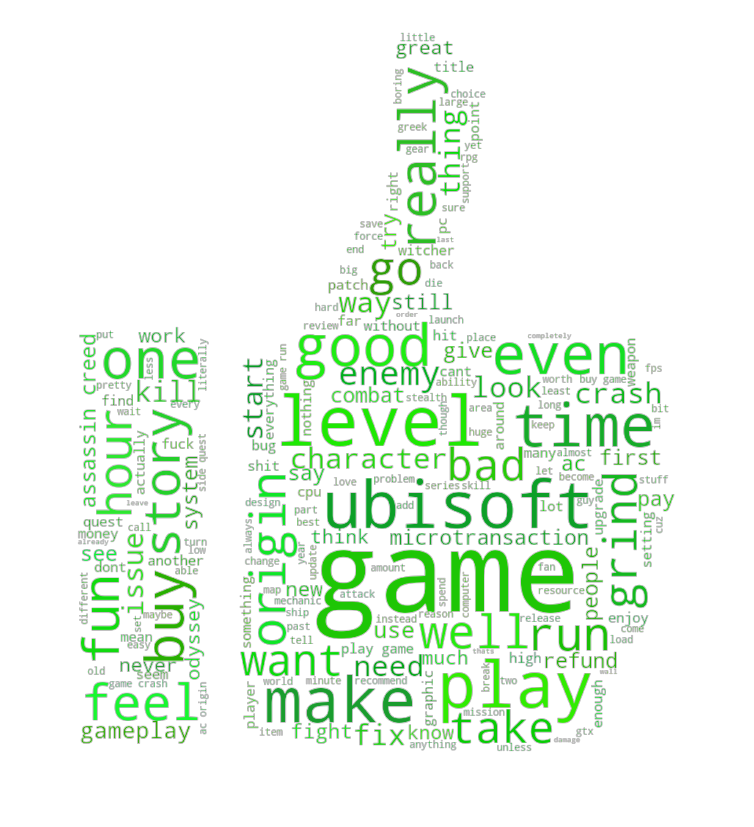

In [8]:
recomendWordCloud(normalize_corpus(GetCorpus(dataframe_eng)[1]))

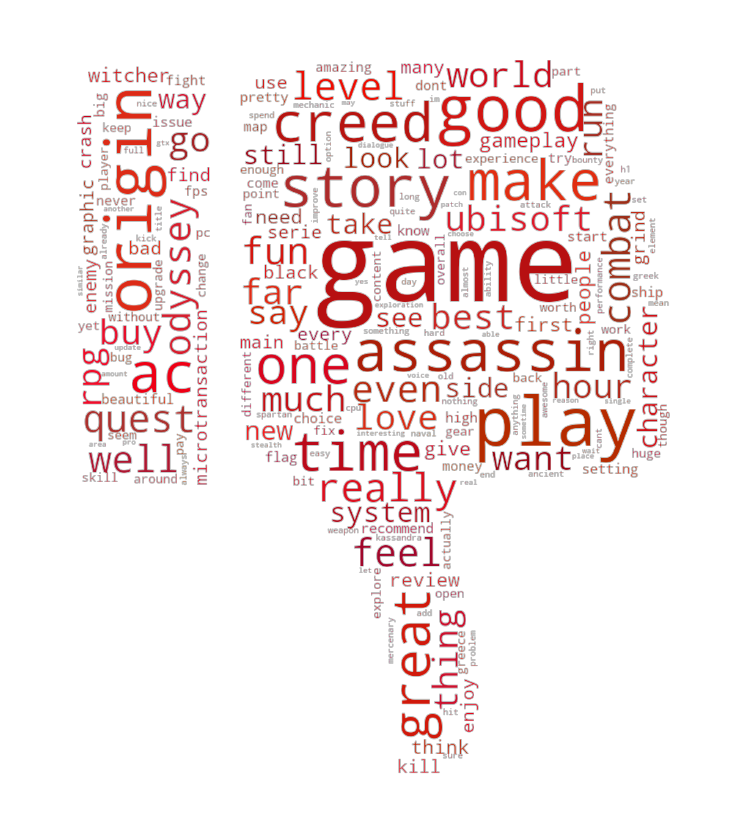

In [9]:
NotrecomendWordCloud(normalize_corpus(GetCorpus(dataframe_eng)[2]))

In [10]:
normalize_all_corpuses(GetCorpus(dataframe_eng)[0],GetCorpus(dataframe_eng)[1],GetCorpus(dataframe_eng)[2])

(['game visual spectacle breathtaking view great combat surprising take captain dynamic simialr middle earth shadow war pro little game feel like busy work great visuals combat easy learn challenge master overwhelming size could con get 300 kick people cliff con combat little bit button mashy game freeze semi often never crash desktop could happen love assassin creed origin game really improve many way upon already solid game',
  'far best rpg ever play much good witcher opinion',
  'overall 610 skyrim wallclimbing bit sail genral point combination open world climb assassin creed fix annoyment opon world rpgs stupid buy xp boost get flood much exp without side mission explore bit world already max level half game also need upgrade gear level actually make grindier impossible get material fast level part seem make sense play kassandra intead alexious pro really nice world dont feel hamper movement like history quite nice wander around course really accurate since would bad game con lege

# Bigram

In [11]:
from nltk.util import ngrams
from matplotlib import pylab as plt
from nltk import *
import numpy as np
from functools import reduce
import math 

def reducelist(l):
    return reduce(lambda x,y: x+y,l)


def tokenize(norm_corpus):
     return reducelist([nltk.word_tokenize(sentence) for sentence in norm_corpus])

    
def gramise(norm_corpus,gramnumbers):
    TwoGram_All=FreqDist(ngrams(tokenize(norm_corpus) ,gramnumbers))
    return TwoGram_All
    
def BigramrecomendWordCloud(twoGram, imgsav=True):
    up_mask = np.array(Image.open("thumbupmask.png"))
    my_dpi=96

    bigram_dict =dict((' '.join(t for t in key), value) for (key, value) in twoGram.most_common(200))

    word_cloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",mask=up_mask, max_words=200).generate_from_frequencies( bigram_dict)

    w = int(960/96)
    h = int(1080/96)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(word_cloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
    if(imgsav):
        fig.savefig('bigramthumbup.png',dpi=96,  transparent=True)
        fig=plt.figure(figsize=(960/my_dpi, 1080/my_dpi), dpi=my_dpi)

def BigramNotrecomendWordCloud(twoGram, imgsav=True):
    down_mask = np.array(Image.open("thumbdownmask.png"))
    my_dpi=96

    bigram_dict =dict((' '.join(t for t in key), value) for (key, value) in twoGram.most_common(200))

    word_cloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",mask=down_mask, max_words=200).generate_from_frequencies( bigram_dict)

    w = int(960/96)
    h = int(1080/96)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(word_cloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")
    if(imgsav):
        fig.savefig('bigramthumbdown.png',dpi=96,  transparent=True)
        fig=plt.figure(figsize=(960/my_dpi, 1080/my_dpi), dpi=my_dpi)
        
        
def BigramNotrecomendWordCloud_dict(dict_gram, imgsav=True):
    down_mask = np.array(Image.open("thumbdownmask.png"))
    my_dpi=96

    bigram_dict =dict((' '.join(t for t in key), value) for (key, value) in dict_gram)

    word_cloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",mask=down_mask, max_words=200).generate_from_frequencies( bigram_dict)

    w = int(960/96)
    h = int(1080/96)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(word_cloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")
    if(imgsav):
        fig.savefig('bigramthumbdown.png',dpi=96,  transparent=True)
        fig=plt.figure(figsize=(960/my_dpi, 1080/my_dpi), dpi=my_dpi)

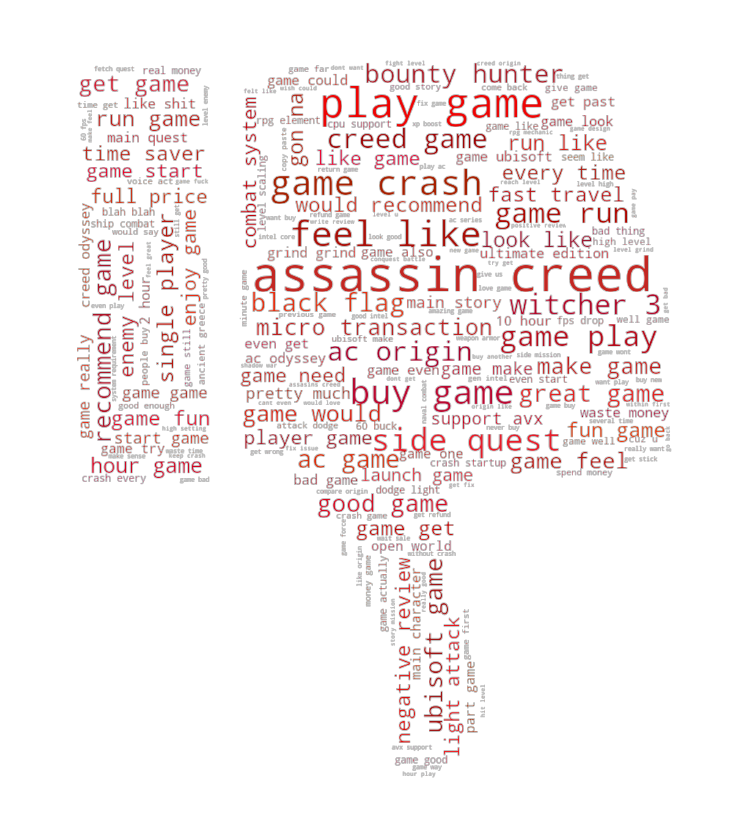

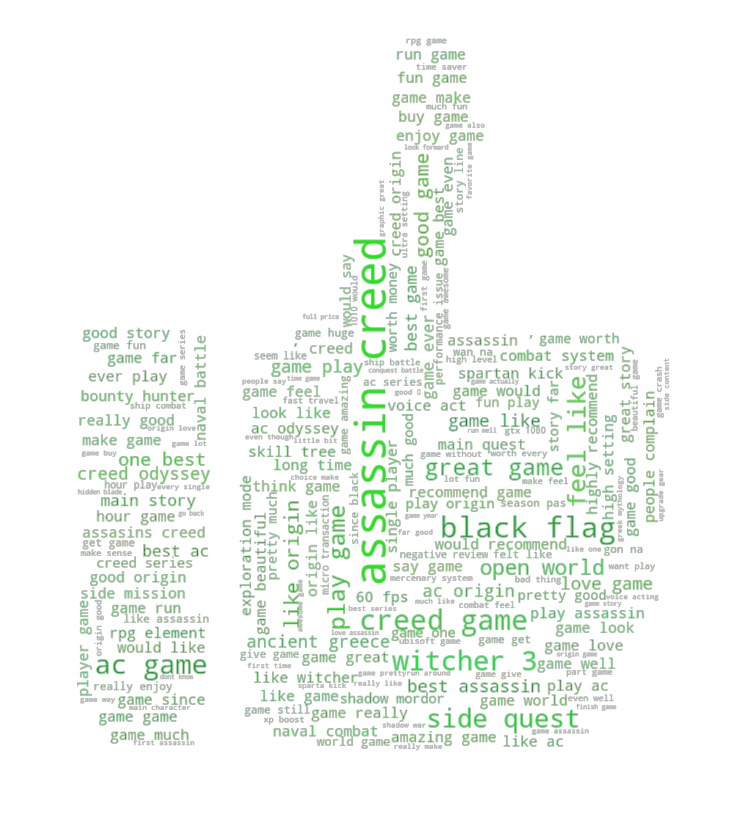

In [16]:
#0=corpus_recommended,1=corpus_not_recommended,2=corpus

BigramNotrecomendWordCloud(gramise(normalize_corpus(GetCorpus(dataframe_eng)[1]),2))
BigramrecomendWordCloud(gramise(normalize_corpus(GetCorpus(dataframe_eng)[0]),2))

In [13]:
negfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[1]),3)
posfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[0]),3)
allfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[2]),3)

In [14]:
neg_most_common = [item for item in negfd.most_common(200)]
pos_most_common = [item for item in posfd.most_common(200)]
all_most_common = [item for item in negfd.most_common(200)]

In [18]:
adjustedf=allfd
for words in allfd.keys():
    if words in negfd.keys():
        adjustedf[words]=allfd[words]-negfd[words]

In [19]:
adjustedf.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 20, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 71,

In [20]:
d3 = {key: posfd[key] - negfd.get(key, 0) for key in posfd.keys()}

d4 = {key: negfd[key] - posfd.get(key, 0) for key in negfd.keys()}

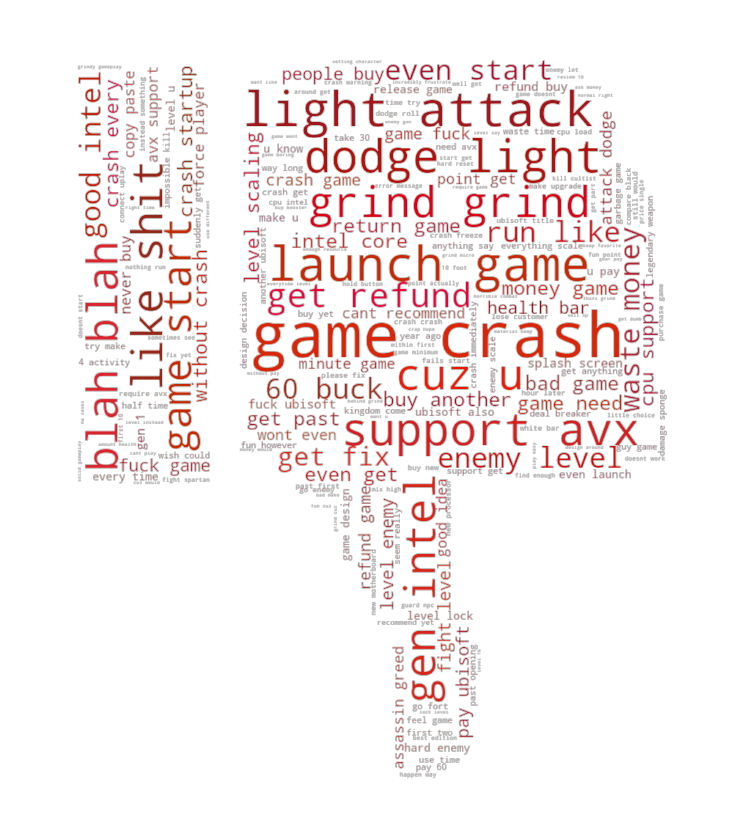

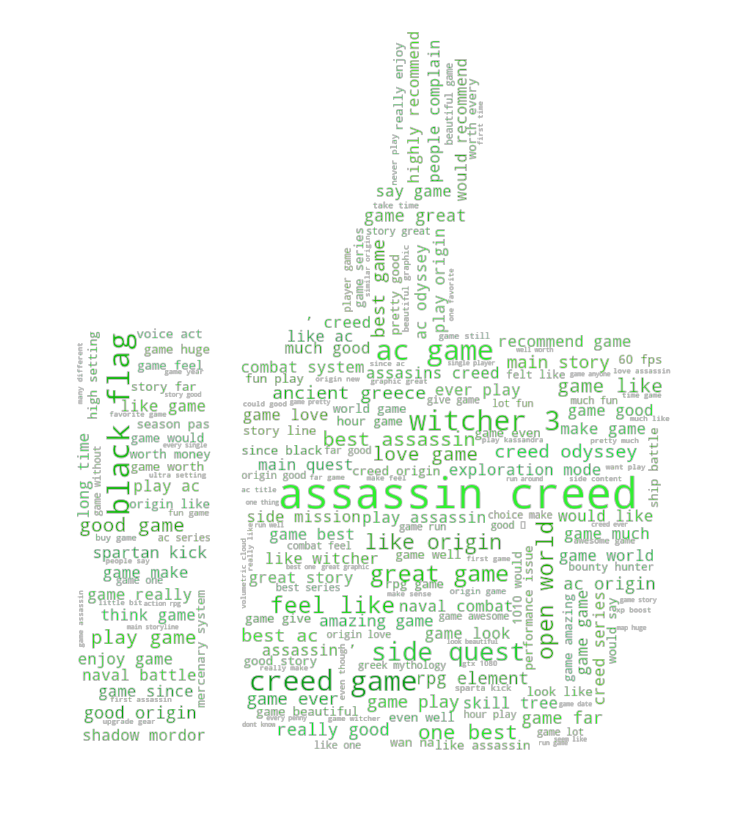

In [21]:
negfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[1]),2)
posfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[0]),2)
allfd=gramise(normalize_corpus(GetCorpus(dataframe_eng)[2]),2)

BigramNotrecomendWordCloud(FreqDist({key: max(negfd[key] - posfd.get(key, 0),0) for key in negfd.keys()}))
BigramrecomendWordCloud(FreqDist({key: max(posfd[key] - negfd.get(key, 0),0) for key in posfd.keys()}))

Text(0.5,0,'# of Games Owned')

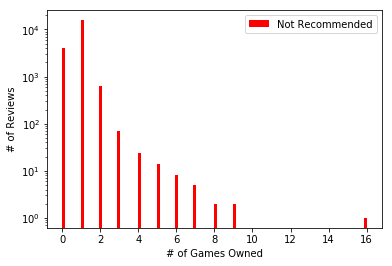

In [22]:
plt.hist({key: max(negfd[key] - posfd.get(key, 0),0) for key in negfd.keys()}.values(),color=("red"),bins=100)
plt.yscale('log')
legend = ['Not Recommended']
plt.legend(legend)
plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('# of Games Owned')
#plt.savefig('Games_Owned',dpi=96)

Text(0.5,0,'# of Games Owned')

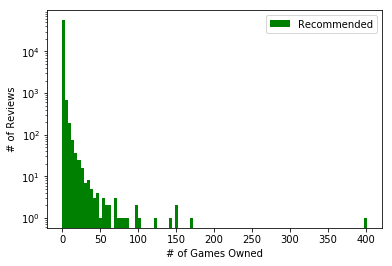

In [23]:
plt.hist({key: max(posfd[key] - negfd.get(key, 0),0) for key in posfd.keys()}.values(),color=("green"),bins=100)
plt.yscale('log')
legend = ['Recommended']
plt.legend(legend)
plt.ylabel('# of Reviews')
plt.xlabel('# of Games Owned')
#plt.savefig('Games_Owned',dpi=96)

In [24]:
for words,num in all_most_common:
    if words in neg_most_common:
        neg_most_common

D:\Users\ben__\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


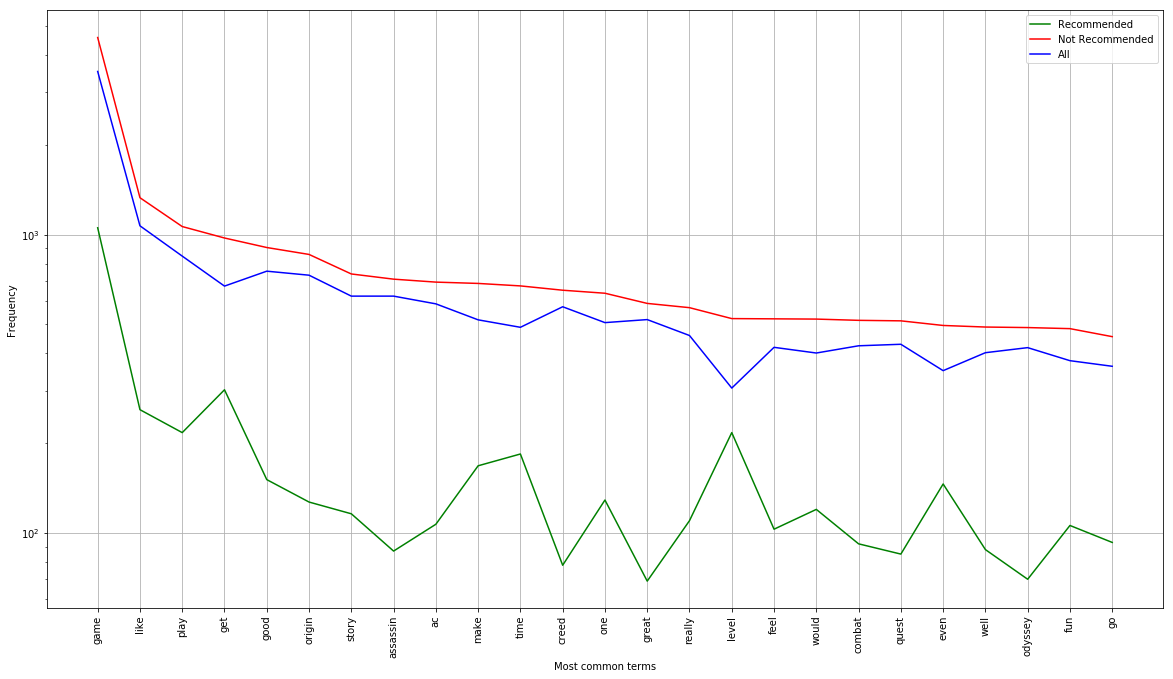

In [45]:
from matplotlib import pylab as plt
from nltk import *
import numpy as np
from functools import reduce
import math 

def reducelist(l):
    return reduce(lambda x,y: x+y,l)

# you may use a tokenizer like nltk.tokenize.word_tokenize()
flat_tokenized_corpus = reducelist([nltk.word_tokenize(sentence) for sentence in normalize_corpus(GetCorpus(dataframe_eng)[0])])
flat_tokenized_corpus_recommended = reducelist([nltk.word_tokenize(sentence) for sentence in normalize_corpus(GetCorpus(dataframe_eng)[1])])
flat_tokenized_corpus_not_recommended = reducelist([nltk.word_tokenize(sentence) for sentence in normalize_corpus(GetCorpus(dataframe_eng)[2])])

dist = {}
dist["Recommended"] = FreqDist(flat_tokenized_corpus_recommended)
dist["Not Recommended"] =  FreqDist(flat_tokenized_corpus_not_recommended)
dist["All"] =  FreqDist(flat_tokenized_corpus)


# sorted list of 50 most common terms in one of the texts
# (too many terms would be illegible in the graph)
most_common = [item for item, _ in dist["Not Recommended"].most_common(25)] 

colors = ["green", "red", "blue"]

# loop over the dictionary keys to plot each distribution
fig = plt.figure(frameon=False)
for i, label in enumerate(dist):
    frequency = [dist[label][term] for term in most_common]
    color = colors[i]
    plt.plot(frequency, color=color, label=label)
plt.gca().grid(True)
plt.yscale('log')
plt.xticks(np.arange(0, len(most_common), 1), most_common, rotation=90)
plt.xlabel("Most common terms")
plt.ylabel("Frequency")
plt.legend(loc="upper right")

w = int(1920/96)
h = int(1080/96)

fig.set_size_inches(w,h)
fig.show()
fig.savefig('CommonTermsAll.png',dpi=96)


In [ ]:
dist["All"].most_common(50)


sortedAll = [[item, freq] for item, freq in dist["All"].most_common(len(dist["All"]))] 

In [ ]:
type(sortedAll)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


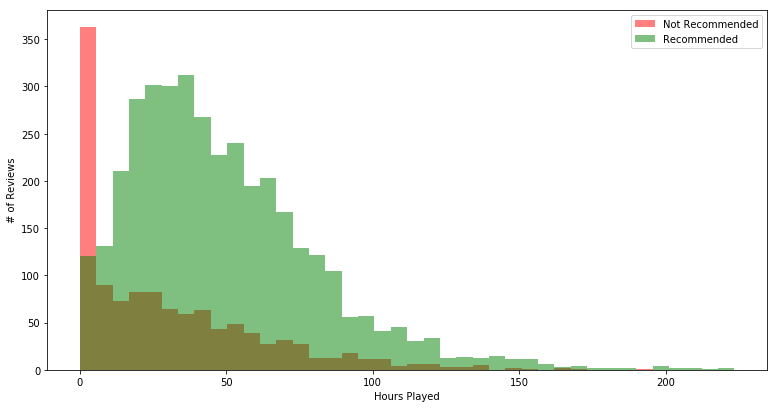

In [43]:

x = dataframe_all[dataframe_all['voted_up']]['playtime_forever']
y = dataframe_all[dataframe_all['voted_up']==False]['playtime_forever']

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x/60,y/60), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.ylabel('# of Reviews')
plt.xlabel('Hours Played')
#plt.yscale('log')
plt.savefig('Hours Played',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


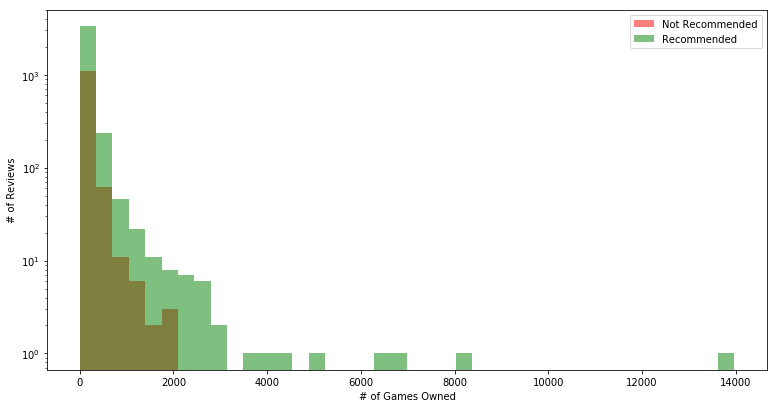

In [27]:

x = dataframe_all[dataframe_all['voted_up']]['num_games_owned']
y = dataframe_all[dataframe_all['voted_up']==False]['num_games_owned']

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x,y), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('# of Games Owned')
plt.savefig('Games_Owned',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


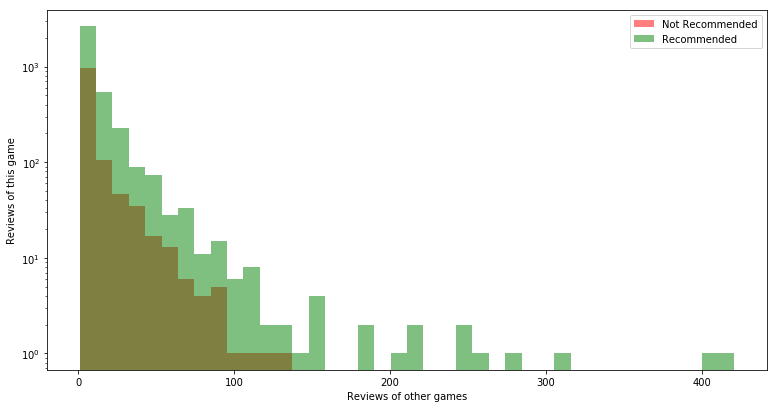

In [42]:
x = dataframe_all[dataframe_all['voted_up']]['num_reviews']
y = dataframe_all[dataframe_all['voted_up']==False]['num_reviews']

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x,y), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.yscale('log')
plt.ylabel('Reviews of this game')
plt.xlabel('Reviews of other games')
plt.savefig('Reviews',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


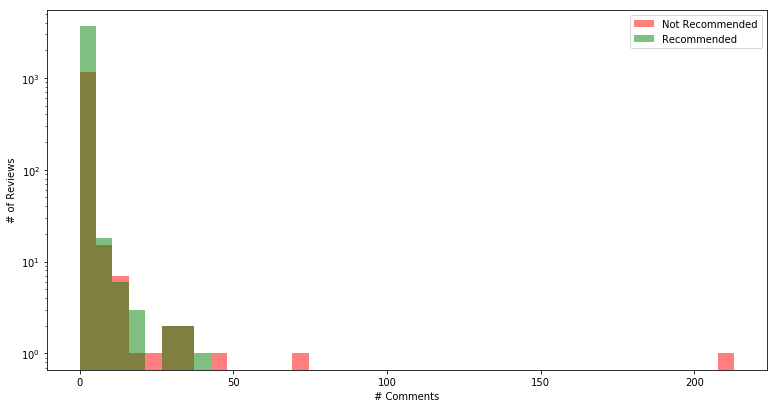

In [29]:
x = dataframe_all[dataframe_all['voted_up']]['comment_count'].astype(float)
y = dataframe_all[dataframe_all['voted_up']==False]['comment_count'].astype(float)

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x,y), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('# Comments')
plt.savefig('Comments',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


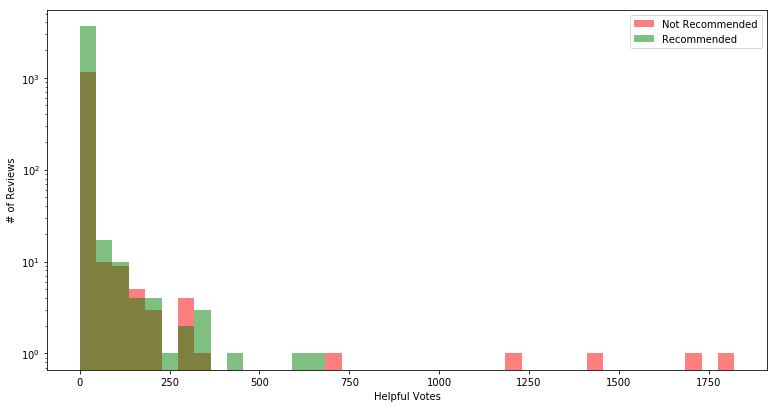

In [30]:
x = dataframe_all[dataframe_all['voted_up']]['votes_up'].astype(float)
y = dataframe_all[dataframe_all['voted_up']==False]['votes_up'].astype(float)

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x,y), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Helpful Votes')
plt.savefig('Helpful_Votes',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


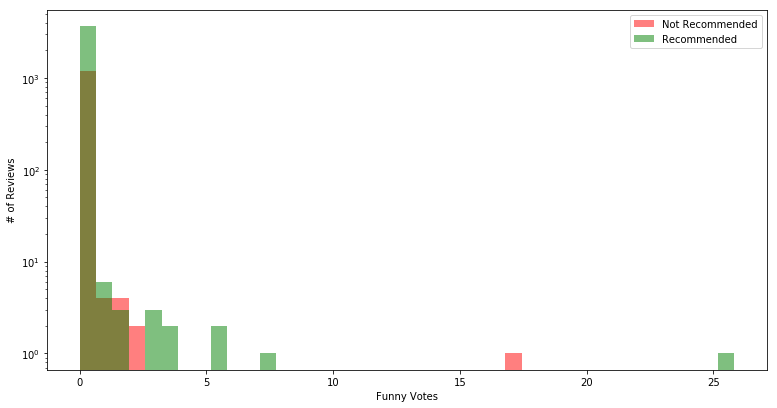

In [31]:
x = dataframe_all[dataframe_all['voted_up']]['votes_funny'].astype(float)
y = dataframe_all[dataframe_all['voted_up']==False]['votes_funny'].astype(float)

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x/60,y/60), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Funny Votes')
plt.savefig('votes_funny',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


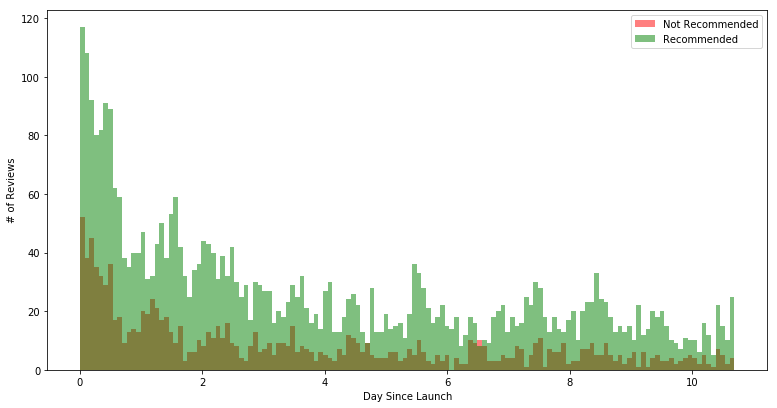

In [40]:
#https://www.epochconverter.com/

x = dataframe_all[dataframe_all['voted_up']]['timestamp_created']-min(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])
y = dataframe_all[dataframe_all['voted_up']==False]['timestamp_created']-min(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])


w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x/days,y/days), bins=140,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
#plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Day Since Launch')
plt.savefig('Day_Since_Launch',dpi=96)

Text(0.5,0,'Days Since Launch')

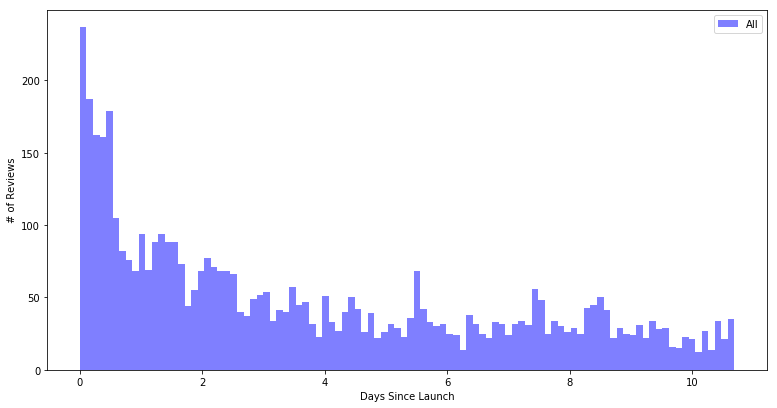

In [33]:
z = dataframe_all['timestamp_created']-min(dataframe_all['timestamp_created'])
days= 60*60*24
w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist(z/days, bins=100,color=('blue'),histtype='stepfilled',alpha=0.5)
legend = ["All" ]
plt.legend(legend)
#plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Days Since Launch')
#plt.savefig('Day_Since_Launch',dpi=96)

D:\Users\ben__\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


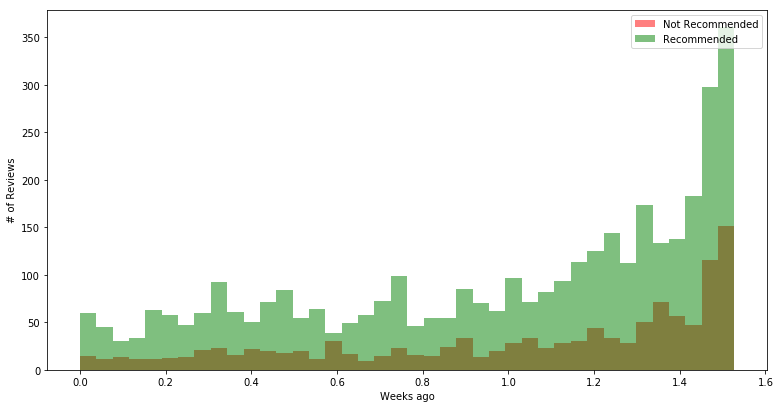

In [39]:
#https://www.epochconverter.com/

x = max(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])-dataframe_all[dataframe_all['voted_up']]['timestamp_created']
y = max(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])- dataframe_all[dataframe_all['voted_up']==False]['timestamp_created']
weeks= 60*60*24*7

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.hist((x/weeks,y/weeks), bins=40,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
#plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Weeks ago')
plt.savefig('Weeks_Since_Launch',dpi=96)

In [35]:
min(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])

1538796972

In [36]:
max(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])

1539720956

In [37]:
1465560000

1465560000

In [38]:
#https://www.epochconverter.com/

x = dataframe_all[dataframe_all['voted_up']]['timestamp_created']-min(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])
y = dataframe_all[dataframe_all['voted_up']==False]['timestamp_created']-min(dataframe_all[dataframe_all['voted_up']]['timestamp_created'])

days= 60*60*24

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
plt.bar(((y(x+y))/days,y), bins=140,color=('green','red'),histtype='stepfilled',alpha=0.5)
legend = ['Not Recommended','Recommended' ]
plt.legend(legend)
#plt.yscale('log')
plt.ylabel('# of Reviews')
plt.xlabel('Day Since Launch')
plt.savefig('Day_Since_Launch',dpi=96)

NameError: name 'dataframe' is not defined

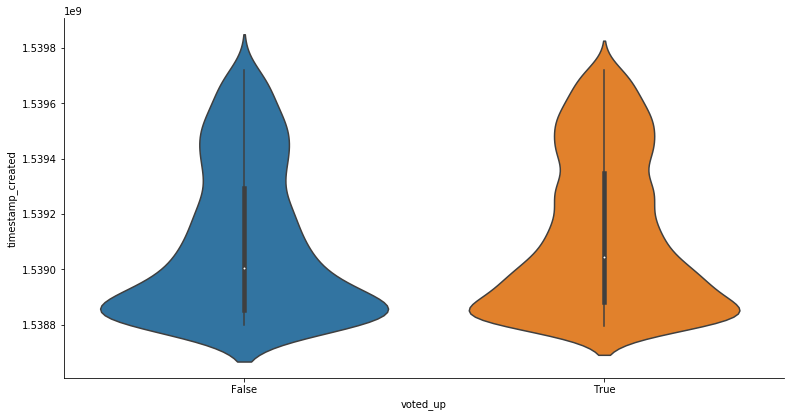

In [56]:
import seaborn as sns

w = int(960/96)
h = int(540/96)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
sns.violinplot(dataframe_all['voted_up'],dataframe_all['timestamp_created'])
sns.despine()
#plt.yscale('log')
